In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.decomposition import PCA 
from sklearn.decomposition import SparsePCA 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.metrics.pairwise import polynomial_kernel 
from sklearn.metrics.pairwise import rbf_kernel 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [2]:
#restructured data from sources 

players_data = pd.read_csv('players_data.csv')
final_data = pd.read_csv('final_data.csv')

In [3]:
players_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,allstar
0,1321,Doug Christie,TOR,30.0,198.12,92.986360,Pepperdine,USA,1992,1,...,3.9,4.4,0.3,0.030,0.112,0.194,0.526,0.227,2000,0
1,1322,Doug Overton,BOS,30.0,190.50,86.182480,La Salle,USA,1991,2,...,0.7,1.1,-2.9,0.035,0.050,0.185,0.466,0.205,2000,0
2,1323,Doug West,VAN,33.0,198.12,99.790240,Villanova,USA,1989,2,...,1.9,1.1,3.2,0.038,0.109,0.144,0.467,0.123,2000,0
3,1324,Drew Barry,ATL,27.0,195.58,86.636072,Georgia Tech,USA,1996,2,...,0.8,2.1,-9.6,0.000,0.078,0.132,0.582,0.330,2000,0
4,1325,Duane Causwell,MIA,32.0,213.36,115.665960,Temple,USA,1990,1,...,1.9,0.1,-14.9,0.064,0.200,0.154,0.614,0.017,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,9070,Greg Monroe,MIL,26.0,210.82,120.201880,Georgetown,USA,2010,1,...,8.8,2.3,-2.7,0.109,0.239,0.234,0.562,0.128,2016,0
7750,9071,Greg Smith,MIN,25.0,208.28,113.398000,Fresno State,USA,Undrafted,Undrafted,...,2.3,0.3,-17.8,0.069,0.186,0.108,0.545,0.049,2016,0
7751,9072,Zaza Pachulia,DAL,32.0,210.82,124.737800,None,Georgia,2003,2,...,9.4,1.7,0.9,0.137,0.262,0.164,0.550,0.101,2016,0
7752,9073,Gorgui Dieng,MIN,26.0,210.82,109.315672,Louisville,Senegal,2013,1,...,7.1,1.7,0.8,0.086,0.222,0.169,0.601,0.099,2016,0


In [4]:
players_stats = players_data.drop(["season", "draft_number", "draft_round", "college", "country","Unnamed: 0", "team_abbreviation", "draft_year"], axis = 1)
allstar_stats = final_data.drop(["season", "draft_number", "draft_round", "college", "country","Unnamed: 0", "team_abbreviation", "draft_year"], axis = 1) 

In [5]:
Y = players_stats["allstar"]
X = players_stats.drop(['allstar'], axis = 1)
X = X.drop('player_name', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
# Model 1 - No transformations, Logistic Regression 

m1_pipeline = sklearn.pipeline.Pipeline([
    ('classifier', LogisticRegression())
])

m1_paramgrid = dict()
m1_paramgrid['classifier__penalty'] = ['l1', '12']
m1_paramgrid['classifier__solver'] = ['liblinear', 'saga']
m1_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs1 = GridSearchCV( 
    m1_pipeline, 
    m1_paramgrid,  
    scoring = 'accuracy')


gs1_results = gs1.fit(x_train, y_train)
print(gs1_results.best_score_)
print(gs1_results.best_params_)

C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib

0.9638890332978087
{'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [7]:
%%time
m1_best_pipeline = sklearn.pipeline.Pipeline([
    ('classifier', LogisticRegression(C = 0.01, penalty = 'l1', solver = 'liblinear'))
])

m1_best_pipeline.fit(x_train, y_train) 
m1_pred = m1_best_pipeline.predict(x_test) 
m1_acc = accuracy_score(m1_pred, y_test)
print(m1_acc)



0.9600257898130239
Wall time: 546 ms


In [8]:
#Model 2 - standard scaled data, Logistic Regression
#scale data with the Standard Scaler 

m2_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())
])

m2_paramgrid = dict()
m2_paramgrid['scaler__with_mean'] = [True, False]
m2_paramgrid['scaler__with_std'] = [True, False]
m2_paramgrid['classifier__penalty'] = ['l1', '12']
m2_paramgrid['classifier__solver'] = ['liblinear', 'saga']
m2_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs2 = GridSearchCV( 
    m2_pipeline, 
    m2_paramgrid, 
    scoring = 'accuracy')

gs2_results = gs2.fit(x_train, y_train)
print(gs2_results.best_score_)
print(gs2_results.best_params_)

C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kenny\AppData\Local\Continuum\anaconda3\lib

0.9645338046840477
{'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'scaler__with_mean': False, 'scaler__with_std': True}


In [9]:
%%time
m2_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = False, with_std = True)),
    ('classifier', LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
])

m2_best_pipeline.fit(x_train, y_train) 
m2_pred = m2_best_pipeline.predict(x_test) 
m2_acc = accuracy_score(m2_pred, y_test)
print(m2_acc)

0.9593810444874274
Wall time: 1.28 s


In [10]:
#Model3 - standard vector classifier on scaled data 
m3_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', SVC())
])

m3_paramgrid = dict()
m3_paramgrid['scaler__with_mean'] = [True, False]
m3_paramgrid['classifier__gamma'] = [0.001, 0.01, 0.1, 1, 10]
m3_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs3 = GridSearchCV( 
    m3_pipeline, 
    m3_paramgrid, 
    scoring = 'accuracy')

gs3_results = gs3.fit(x_train,y_train)
print(gs3_results.best_score_)
print(gs3_results.best_params_)

0.96582308752047
{'classifier__C': 100, 'classifier__gamma': 0.001, 'scaler__with_mean': True}


In [11]:
%%time
m3_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m3_best_pipeline.fit(x_train, y_train) 
m3_pred = m3_best_pipeline.predict(x_test) 
m3_acc = accuracy_score(m3_pred, y_test)
print(m3_acc)

0.9606705351386202
Wall time: 332 ms


In [12]:
#Model4 - standard vector classifier on PCA

m4_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

m4_paramgrid = dict()
m4_paramgrid['scaler__with_mean'] = [True, False]
m4_paramgrid['pca__n_components'] = [1,2,3,4,5]
m4_paramgrid['classifier__gamma'] = [0.001, 0.01, 0.1, 1, 10]
m4_paramgrid['classifier__C'] = [0.01, 0.1, 1, 10, 100]

gs4 = GridSearchCV( 
    m4_pipeline, 
    m4_paramgrid, 
    scoring = 'accuracy')

gs4_results = gs4.fit(x_train, y_train)
print(gs4_results.best_score_)
print(gs4_results.best_params_)

0.9640499337163057
{'classifier__C': 100, 'classifier__gamma': 0.001, 'pca__n_components': 4, 'scaler__with_mean': True}


In [13]:
%%time
m4_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('pca', PCA(n_components = 4)), 
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m4_best_pipeline.fit(x_train, y_train) 
m4_pred = m4_best_pipeline.predict(x_test) 
m4_acc = accuracy_score(m4_pred, y_test)
print(m4_acc)

0.9613152804642167
Wall time: 456 ms


In [14]:
%%time
m5_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('spca', SparsePCA(n_components = 4, )), 
    ('classifier', SVC(C = 100, gamma = 0.001))
])

m5_best_pipeline.fit(x_train, y_train) 
m5_pred = m5_best_pipeline.predict(x_test) 
m5_acc = accuracy_score(m5_pred, y_test)
print(m5_acc)

0.9613152804642167
Wall time: 6.63 s


In [15]:
%%time
m6_best_pipeline = sklearn.pipeline.Pipeline([
    ('scaler', StandardScaler(with_mean = True)),
    ('spca', SparsePCA(n_components = 4, )), 
    ('classifier', LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
])

m6_best_pipeline.fit(x_train, y_train) 
m6_pred = m6_best_pipeline.predict(x_test) 
m6_acc = accuracy_score(m6_pred, y_test)
print(m6_acc)

0.9606705351386202
Wall time: 5.44 s


In [16]:
all_x = allstar_stats.drop(["player_name", "allstar"], axis = 1)

Text(0.5, 1.0, 'Height vs. Weight')

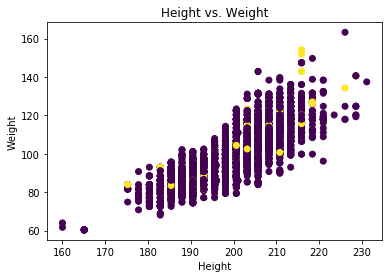

In [17]:
#plot all data 
plt.scatter(players_data['player_height'], players_data['player_weight'], c = players_data['allstar'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')


Text(0.5, 1.0, 'Age vs. Net Rating')

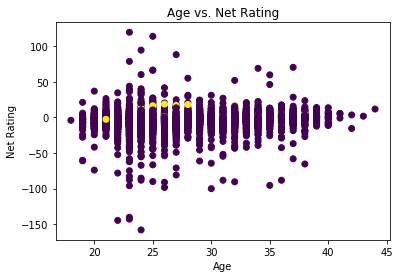

In [18]:
plt.scatter(players_data['age'], players_data['net_rating'], c = players_data['allstar'])
plt.xlabel('Age')
plt.ylabel('Net Rating')
plt.title('Age vs. Net Rating')

Text(0.5, 1.0, 'Points vs. Assists')

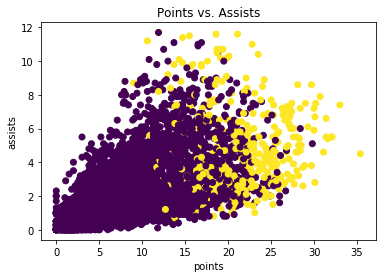

In [19]:
plt.scatter(players_data['pts'], players_data['ast'], c = players_data['allstar'])
plt.xlabel('points')
plt.ylabel('assists')
plt.title('Points vs. Assists')

In [20]:
# Model1 - PCA 
scaler = StandardScaler() 
x_scaled_train = scaler.fit_transform(all_x) 
pca = PCA(n_components = 2) 
x_pca = pca.fit_transform(x_scaled_train) 

In [21]:
pca.components_

array([[ 0.00419027,  0.39249614,  0.37076694, -0.02828956, -0.10930205,
         0.37421295, -0.35852624, -0.01029098,  0.37423321,  0.37849418,
        -0.1038836 ,  0.02662549, -0.36362411],
       [ 0.01531794, -0.11172246, -0.15361607, -0.13159681, -0.66596483,
        -0.13122325, -0.02850694, -0.21579901,  0.05637276, -0.08826882,
        -0.59116213, -0.27397064, -0.05249228]])

In [22]:
pca.explained_variance_ratio_

array([0.41023613, 0.14437877])

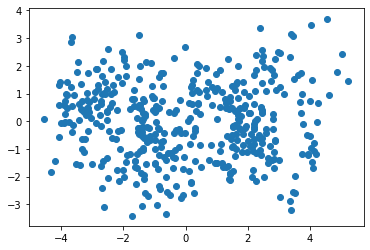

In [23]:
# plot PCA 
plt.scatter(x_pca[:,0], x_pca[:,1])

In [24]:
# implement K-means 
cluster = KMeans(n_clusters = 8, random_state = 42) 
cluster.fit(x_pca) 

cluster_means = cluster.predict(x_pca)

Text(0.5, 1.0, 'PCA of All-Star Players')

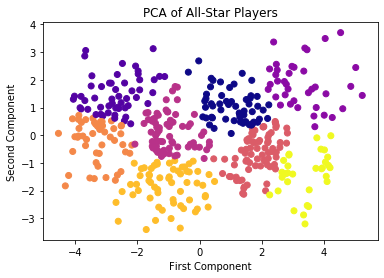

In [25]:
#graph of K-means with regular PCA 
plt.scatter(x_pca[:,0],x_pca[:,1] , c=cluster_means, cmap = 'plasma')
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("PCA of All-Star Players")

In [26]:
# add cluster number to player data 
allstar_stats['cluster'] = cluster.labels_

In [27]:
allstar_stats[allstar_stats["cluster"] == 5]

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,allstar,cluster
3,Gary Payton,31.0,193.04,81.646560,82,24.2,6.5,8.9,2.9,0.032,0.139,0.268,0.535,0.368,1,5
10,Allen Iverson,25.0,182.88,74.842680,70,28.4,3.8,4.7,1.2,0.027,0.078,0.339,0.496,0.220,1,5
17,Stephon Marbury,23.0,187.96,81.646560,74,22.2,3.2,8.4,0.0,0.022,0.071,0.277,0.528,0.380,1,5
32,Gary Payton,32.0,193.04,81.646560,79,23.1,4.6,8.1,-0.6,0.025,0.101,0.270,0.522,0.364,1,5
35,Allen Iverson,26.0,182.88,74.842680,71,31.1,3.8,4.6,5.7,0.019,0.081,0.354,0.518,0.226,1,5
69,Allen Iverson,27.0,182.88,74.842680,60,31.4,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,1,5
76,Gary Payton,33.0,193.04,81.646560,82,22.1,4.8,9.0,3.2,0.029,0.110,0.271,0.526,0.391,1,5
78,Allen Iverson,28.0,182.88,74.842680,82,27.6,4.2,5.5,1.8,0.022,0.095,0.327,0.500,0.248,1,5
123,Allen Iverson,29.0,182.88,74.842680,48,26.4,3.7,6.8,-2.1,0.019,0.079,0.343,0.478,0.325,1,5
142,Allen Iverson,30.0,182.88,74.842680,75,30.7,4.0,7.9,0.3,0.018,0.089,0.347,0.532,0.361,1,5


In [28]:
# Model2 - Sparse PCA 

spca = SparsePCA(n_components = 2) 
x_spca = spca.fit_transform(x_scaled_train)

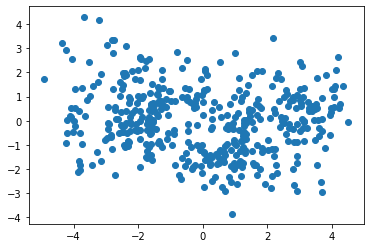

In [29]:
plt.scatter(x_spca[:,0], x_spca[:,1])

In [30]:
cluster_s = KMeans(n_clusters = 8, random_state = 42) 
cluster_s.fit(x_spca) 

cluster_means_s = cluster_s.predict(x_spca)

Text(0.5, 1.0, 'SPCA of All-Star Players')

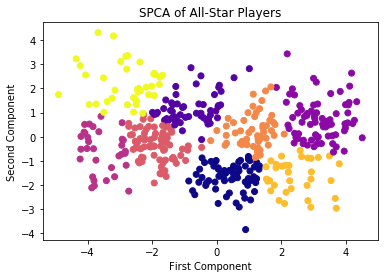

In [31]:
plt.scatter(x_spca[:,0],x_spca[:,1] , c=cluster_means_s, cmap = 'plasma')
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("SPCA of All-Star Players")

In [32]:
allstar_stats['cluster_s'] = cluster_s.labels_

allstar_stats[allstar_stats["cluster_s"] == 6]

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,allstar,cluster,cluster_s
3,Gary Payton,31.0,193.04,81.646560,82,24.2,6.5,8.9,2.9,0.032,0.139,0.268,0.535,0.368,1,5,6
10,Allen Iverson,25.0,182.88,74.842680,70,28.4,3.8,4.7,1.2,0.027,0.078,0.339,0.496,0.220,1,5,6
35,Allen Iverson,26.0,182.88,74.842680,71,31.1,3.8,4.6,5.7,0.019,0.081,0.354,0.518,0.226,1,5,6
69,Allen Iverson,27.0,182.88,74.842680,60,31.4,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,1,5,6
78,Allen Iverson,28.0,182.88,74.842680,82,27.6,4.2,5.5,1.8,0.022,0.095,0.327,0.500,0.248,1,5,6
123,Allen Iverson,29.0,182.88,74.842680,48,26.4,3.7,6.8,-2.1,0.019,0.079,0.343,0.478,0.325,1,5,6
142,Allen Iverson,30.0,182.88,74.842680,75,30.7,4.0,7.9,0.3,0.018,0.089,0.347,0.532,0.361,1,5,6
145,Dwyane Wade,23.0,193.04,96.161504,77,24.1,5.2,6.8,8.0,0.045,0.109,0.306,0.561,0.303,1,6,6
148,Gilbert Arenas,23.0,190.50,86.636072,80,25.5,4.7,5.1,1.5,0.027,0.104,0.271,0.565,0.224,1,5,6
170,Allen Iverson,31.0,182.88,74.842680,72,33.0,3.2,7.4,0.8,0.016,0.071,0.354,0.543,0.331,1,5,6
